# TASK 2 - BY Gaurav Singh Yadav

## Task 2 : - Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data. Titanic Dataset


## Step 1: download requried libaries.

In [2]:
%pip install pandas 
%pip install numpy 
%pip install matplotlib 
%pip install seaborn 
%pip install plotly 


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Step 2: Data Loading and Initial Exploration

In [3]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [5]:
# Load the datasets
train = pd.read_csv('titanic/train.csv')
print("while using head() it give top 5th row data by defult:")
train.head()

while using head() it give top 5th row data by defult:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
## find the description of data

print("The description of data is: ")
train.describe()

The description of data is: 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
## find the information of data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Q.1 how many rows and columns are there in the dataset?

In [5]:
no_rows, no_cols = train.shape
print("number of rows: ", no_rows)
print("number of columns: ", no_cols)

number of rows:  891
number of columns:  12


## Q.2 how many missing values are there in each column and fix them?

In [6]:
missing_values = train.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
!pip install scikit-learn


In [7]:
from sklearn.impute import SimpleImputer

# Age → mean imputation
age_imputer = SimpleImputer(strategy="mean")
train['Age'] = age_imputer.fit_transform(train[['Age']]).ravel()

# Cabin → most frequent imputation
cabin_imputer = SimpleImputer(strategy="most_frequent")
train['Cabin'] = cabin_imputer.fit_transform(train[['Cabin']]).ravel()

# Embarked → most frequent imputation
embarked_imputer = SimpleImputer(strategy="most_frequent")
train['Embarked'] = embarked_imputer.fit_transform(train[['Embarked']]).ravel()

# Check missing values
missing_values = train.isnull().sum()
print("Missing values:")
print(missing_values)


Missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Q.3 what is the distributation of passenger classes and Embarked?

In [8]:
passenger_class = train['Pclass'].value_counts()
print("Passenger class distribution:")
print(passenger_class)

Passenger class distribution:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [9]:
embarked_counts = train['Embarked'].value_counts()
print("passengers embarked from each port:")
print(embarked_counts)

passengers embarked from each port:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


## Q.4 what is the number of survived passengers?

In [10]:
survived_counts = train['Survived'].sum()
print("Number of passengers who survived:", survived_counts)

Number of passengers who survived: 342


In [12]:
survival_rate = train['Survived'].mean()*100
print("survival rate: {:.2f}%".format(survival_rate))

survival rate: 38.38%


In [16]:
## the exact survival percentages
print(train.groupby('Sex')['Survived'].mean())


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


# Data Visualization

## Q.1 Plotting survival rate bt gender 

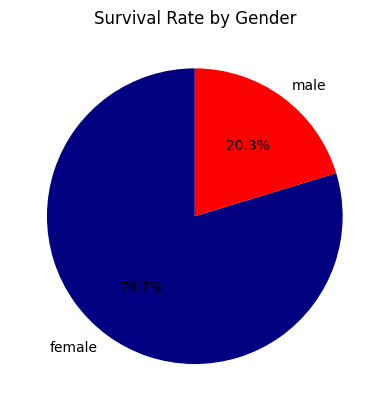

In [33]:
import matplotlib.pyplot as plt

# Calculate survival counts by gender
survival_counts = train.groupby('Sex')['Survived'].mean()

# Labels and values
labels = survival_counts.index
sizes = survival_counts.values

# Plot pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['navy', 'red'])
plt.title("Survival Rate by Gender")
plt.show()



## Q.2 Plotting survival rate by passenger class


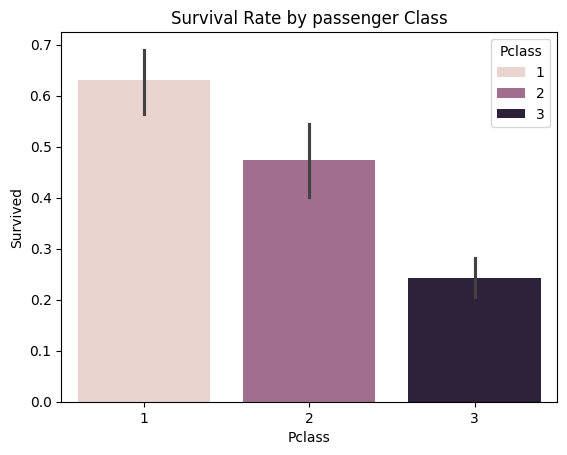

In [29]:
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=train)
plt.title("Survival Rate by passenger Class")
plt.show()

## Q.3 plotting survival rate by embarked port



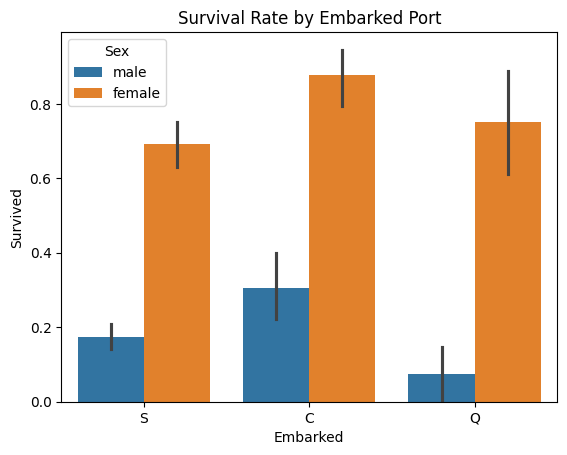

In [31]:
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=train)
plt.title("Survival Rate by Embarked Port")
plt.show()


# Thank you 